In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d


In [2]:
f1 = np.array([[ 1, -1, -1],
               [-1,  1, -1],
               [-1, -1,  1]])

f2 = np.array([[ 1, -1,  1],
               [-1,  1, -1],
               [ 1, -1,  1]])

f3 = np.array([[ 1,  1,  1],
               [ 1, -1, -1],
               [ 1, -1, -1]])

f4 = np.array([[ 1,  1, 1],
               [-1, -1, 1],
               [-1, -1, 1]])

filtros = [f1, f2, f3, f4]

In [3]:
x_matrixes = np.zeros((5, 9, 9))
c_matrixes = np.zeros((5, 9, 9))

In [4]:
for j in range(5):
    for i in range(1,8):
        if j == 0:
            x_matrixes[j, i, i] = 1
            x_matrixes[j, 8-i, i] = 1
        if j == 1:
            x_matrixes[j, i+1, i] = 1
            x_matrixes[j, 8-i+1, i] = 1
        if j == 2:
            x_matrixes[j, i, i+1] = 1
            x_matrixes[j, 8-i, i+1] = 1
        if j == 3:
            x_matrixes[j, i, i-1] = 1
            x_matrixes[j, 8-i, i-1] = 1
        if j == 4:
            x_matrixes[j, i-1, i] = 1
            x_matrixes[j, 8-i-1, i] = 1

In [5]:
for k in range(5):
    for i in range(1,6):
        for j in range(1,6):
            if k == 0:
                if (i!=1) and (i!=5):
                    c_matrixes[k, i+1, 1+1] = 1
                else:
                    c_matrixes[k, i+1, j+1] = 1
            if k == 1:
                if (i!=1) and (i!=5):
                    c_matrixes[k, i, 1] = 1
                else:
                    c_matrixes[k, i, j] = 1
            if k == 2:
                if (i!=1) and (i!=5):
                    c_matrixes[k, i, 1+1] = 1
                else:
                    c_matrixes[k, i, j+1] = 1
            if k == 3:
                if (i!=1) and (i!=5):
                    c_matrixes[k, i+1, 1] = 1
                else:
                    c_matrixes[k, i+1, j] = 1
            if k == 4:
                if (i!=1) and (i!=5):
                    c_matrixes[k, i+2, 1+2] = 1
                else:
                    c_matrixes[k, i+2, j+2] = 1


In [6]:
results_x = []
results_c = []
for filtro in (filtros):
    filter_x = []
    filter_c = []
    for x_matrix in x_matrixes:
        filter_x.append(convolve2d(x_matrix, filtro))
    results_x.append(filter_x)
    for c_matrix in c_matrixes:
            filter_c.append(convolve2d(c_matrix, filtro))
    results_c.append(filter_c)

In [7]:
def relu(x): return(x>0)*x

In [8]:
def maxpool(mat,ksize):

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    ny=m//ky
    nx=n//kx
    mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))

    return result

In [9]:
results_x_relu = []
results_c_relu = []

for result_c, result_x in zip(results_c, results_x):
    relu_x = []
    relu_c = []
    for x_matrix in result_x:
        relu_x.append(relu(x_matrix))
    results_x_relu.append(relu_x)
    for c_matrix in result_c:
        relu_c.append(relu(c_matrix))
    results_c_relu.append(relu_c)

In [10]:
results_x_mp = []
results_c_mp = []

for result_c, result_x in zip(results_c_relu, results_x_relu):
    mp_x = []
    mp_c = []
    for x_matrix in result_x:
        mp_x.append(maxpool(x_matrix, (3, 3)))
    results_x_mp.append(mp_x)
    for c_matrix in result_c:
        mp_c.append(maxpool(c_matrix, (3, 3)))
    results_c_mp.append(mp_c)

In [11]:
x_vectors = []
c_vectors = []
for result_c, result_x in zip(results_c_mp, results_x_mp):
    x_vector = []
    c_vector = []
    for x, c in zip(result_c, result_x):
        x_vector.append(x.reshape(-1, 1))
        c_vector.append(c.reshape(-1, 1))
    x_vectors.append(x_vector)
    c_vectors.append(c_vector)

<IPython.core.display.Javascript object>


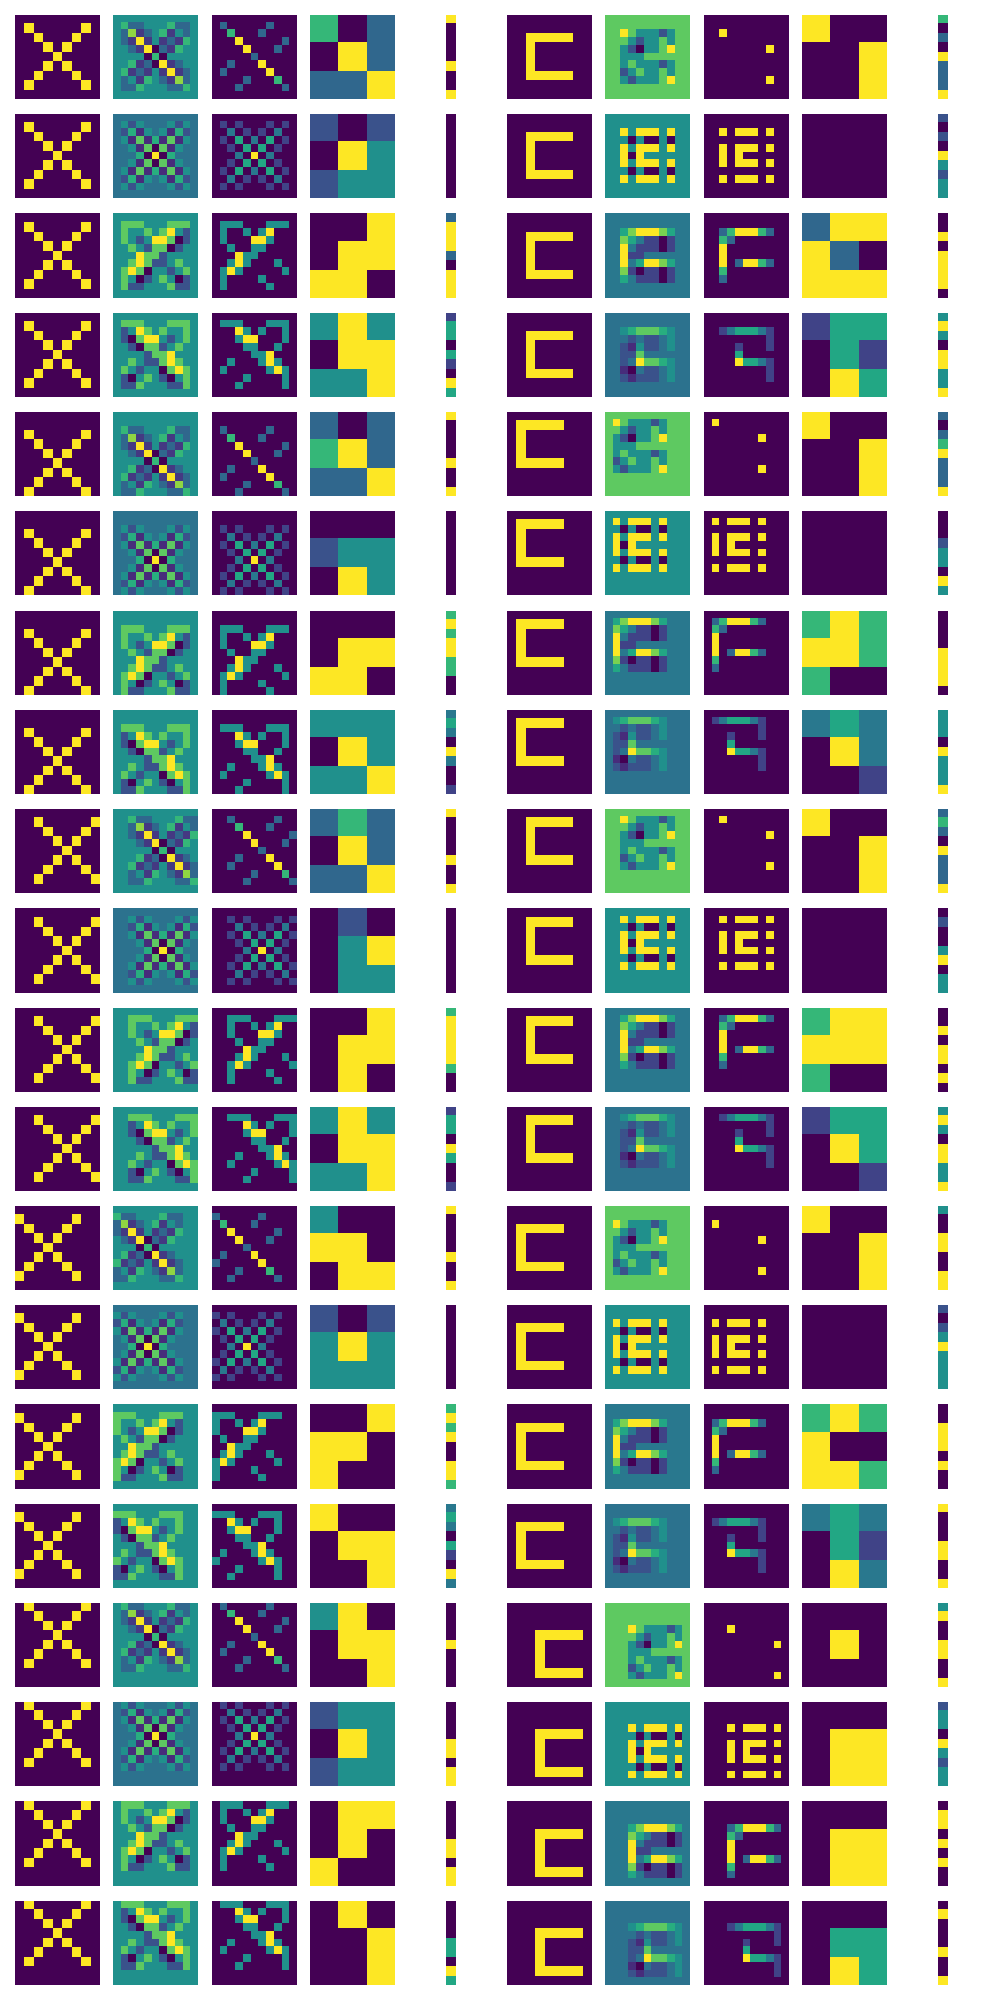

In [12]:
from math import floor
%matplotlib notebook
fig1, ax = plt.subplots(20, 10, figsize=(10,20))
for j in range(20):
    ax[j][0].imshow(x_matrixes[floor(j/4)])
    ax[j][1].imshow(results_x[(j)%4][floor(j/4)])
    ax[j][2].imshow(results_x_relu[(j)%4][floor(j/4)])
    ax[j][3].imshow(results_x_mp[(j)%4][floor(j/4)])
    ax[j][4].imshow(x_vectors[(j)%4][floor(j/4)])
    ax[j][0].set_axis_off()
    ax[j][1].set_axis_off()
    ax[j][2].set_axis_off()
    ax[j][3].set_axis_off()
    ax[j][4].set_axis_off()
    ax[j, 5].imshow(c_matrixes[floor(j/4)])
    ax[j, 6].imshow(results_c[(j)%4][floor(j/4)])
    ax[j, 7].imshow(results_c_relu[(j)%4][floor(j/4)])
    ax[j, 8].imshow(results_c_mp[(j)%4][floor(j/4)])
    ax[j, 9].imshow(c_vectors[(j)%4][floor(j/4)])
    ax[j, 5].set_axis_off()
    ax[j, 6].set_axis_off()
    ax[j, 7].set_axis_off()
    ax[j, 8].set_axis_off()
    ax[j, 9].set_axis_off()
fig1.tight_layout()

In [118]:
x_stack = []
c_stack = []
for j in range(5):
    x = []
    c = []
    for i in range(4):
        x.append(x_vectors[i][j])
        c.append(c_vectors[i][j])
    x_stack.append(np.vstack(x))
    c_stack.append(np.vstack(c))
    
x = np.array(x_stack)
c = np.array(c_stack)

In [127]:
x_data = np.vstack((x,c)).reshape(10, -1)
y = ['x','x','x','x','x','c','c','c','c','c']
x_data.shape

(10, 36)

In [128]:
x_ent = np.zeros((9, 9))
for i in range(2,8):
    x_ent[i, i] = 1
    x_ent[i, i-1] = 1
    x_ent[-i, i] = 1

<IPython.core.display.Javascript object>


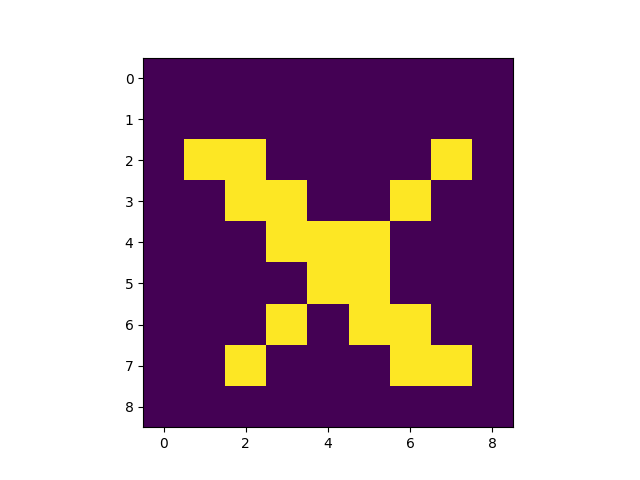

In [129]:
%matplotlib notebook

plt.imshow(x_ent)

In [130]:
from sklearn.svm import SVC


In [131]:
clf = SVC(C=100, kernel='rbf')
clf.fit(x_data, y)

SVC(C=100)

In [132]:
x_ent_filt = []
for filtro in filtros:
    x_ent_filt.append(convolve2d(x_ent,filtro))

In [133]:
relu_x_ent = []
for x in x_ent_filt:
    relu_x_ent.append(relu(x))

In [134]:
mp_x_ent = []
for x in relu_x_ent:
    mp_x_ent.append(maxpool(x, (3,3)))

In [137]:
vec_x_ent = []
for x in mp_x_ent:
    vec_x_ent.append(mp_x_ent[j].reshape(-1, 1))

<IPython.core.display.Javascript object>


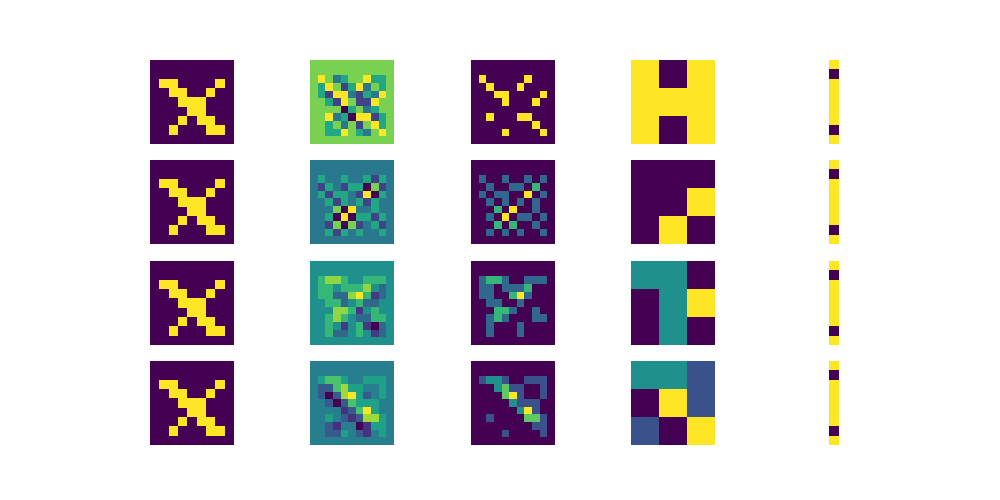

In [138]:
fig1, ax = plt.subplots(4, 5, figsize=(10,5))
for j in range(4):
    ax[j][0].imshow(x_ent)
    ax[j][1].imshow(x_ent_filt[j])
    ax[j][2].imshow(relu_x_ent[j])
    ax[j][3].imshow(mp_x_ent[j])
    ax[j][4].imshow(vec_x_ent[j])
    ax[j][0].set_axis_off()
    ax[j][1].set_axis_off()
    ax[j][2].set_axis_off()
    ax[j][3].set_axis_off()
    ax[j][4].set_axis_off()

In [139]:
x_test = np.vstack(vec_x_ent)
x_test = x_test.reshape(1, -1)

In [141]:
clf.predict(x_test)

array(['x'], dtype='<U1')